#  Mode coupling between parallel strip waveguides

In [16]:
import meep as mp
print(mp.__version__)
import meep.adjoint as mpa
import numpy as np
from autograd import numpy as npa
from matplotlib import pyplot as plt
from IPython.display import Video

1.27.0


In [111]:
seed = np.random.randint(100000)
np.random.seed(seed)
mp.verbosity(0)
Si = mp.Medium(index=3.4)
SiO2 = mp.Medium(index=1.44)
Air = mp.Medium(index=1.0)




waveguide_width = 0.5 # (μm)
waveguide_length = 60 # (μm)
waveguide_thickness = 0.22

arm_separation =waveguide_width+ 0.5 # (μm) distance between arms center to center

air_cladding=200 # just some large value
soi_cladding=200


pml_size = 0.5 # (μm)
resolution = 10 # (pixels/μm)

gap=0.15


In [112]:
minimum_length = 0.09 # (μm)
eta_e = 0.75

eta_i = 0.5
eta_d = 1-eta_e
design_region_resolution = int(resolution) # (pixels/μm)
frequencies = 1/np.linspace(1.5,1.6,5) # (1/μm)


In [113]:
Sx = 2*pml_size + waveguide_length # cell size in X
#Sy = 2*pml_size + 2*waveguide_width+ arm_separation +1 # cell size in Y
Sy = 2*pml_size + 2*waveguide_width +gap+1 # cell size in Y

Sz = 2*pml_size + waveguide_thickness +1 # cell size in Z ###

cell_size = mp.Vector3(Sx,Sy,Sz)

pml_layers = [mp.PML(pml_size)]

fcen = 1/1.55
width = 0.2
fwidth = width * fcen
#source_center  = [-Sx/2 + pml_size + waveguide_length/3,arm_separation/2,0]
#source_size    = mp.Vector3(0,waveguide_width+0.5,waveguide_thickness+0.5)###
#source_size = mp.Vector3(0,2*waveguide_width,2*waveguide_thickness)
source_size= mp.Vector3(0,waveguide_width,Sz-2*pml_size)
kpoint = mp.Vector3(1,0,0)

#source_center1  = [-Sx/2 + pml_size + 0.1 ,arm_separation/2,0]

source_center1  = [-Sx/2 + pml_size + 0.1 ,(waveguide_width+gap)/2,0]
source_center2  = [-Sx/2 + pml_size + 0.1,-arm_separation/2,0]

# src = mp.GaussianSource(frequency=fcen,fwidth=fwidth)
# sources = [mp.EigenModeSource(src,
#                     eig_band = 1,
#                     direction=mp.NO_DIRECTION,
#                     eig_kpoint=kpoint,
#                     size = source_size,
#                     center=source_center1,
#                     amplitude=1.0),
#             mp.EigenModeSource(
#                     src,
#                     eig_band=1,
#                     direction=mp.NO_DIRECTION,
#                     eig_kpoint=kpoint,
#                     size=source_size,
#                     center=source_center2,
#                     amplitude=0.0 - 1.0j
#     )]


source=[mp.EigenModeSource(mp.ContinuousSource(fcen, fwidth=fwidth), center=source_center1, size=source_size, eig_band=1,direction=mp.NO_DIRECTION,eig_kpoint=kpoint)]




geometry=[]

# the top and bottom cladding
geometry.append(mp.Block(center=mp.Vector3(0, 0, -(waveguide_thickness+soi_cladding)/2), material=SiO2, size=mp.Vector3(mp.inf, mp.inf, soi_cladding))) #Oxide layer
geometry.append(mp.Block(center=mp.Vector3(0, 0, (-waveguide_thickness+air_cladding)/2), material=Air, size=mp.Vector3(mp.inf, mp.inf, air_cladding))) #the air cladding

# the waveguides
geometry.append(mp.Block(center=mp.Vector3(0,(gap+waveguide_width)/2,0), material=Si, size=mp.Vector3(mp.inf, waveguide_width, waveguide_thickness))) # top left waveguide
geometry.append(mp.Block(center=mp.Vector3(0,-(gap+waveguide_width)/2,0), material=Si, size=mp.Vector3(mp.inf, waveguide_width, waveguide_thickness))) # top left waveguide


sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=source,
                    #symmetries=[mp.Mirror(direction=mp.Y)],
                    default_material=SiO2,
                    resolution=resolution,
                    eps_averaging = True,)

  

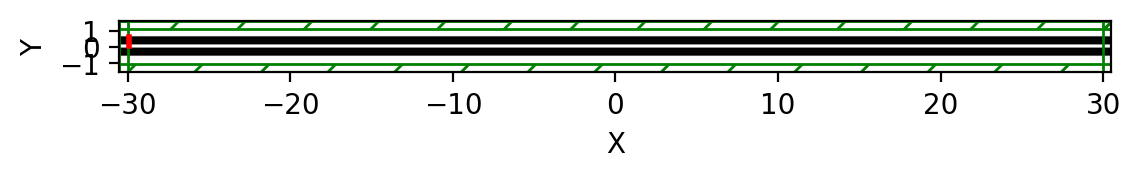

In [114]:
plt.figure(dpi=200)

sim.plot2D(
    output_plane = mp.Volume(
        center = mp.Vector3(z=0),
        size = mp.Vector3(x=Sx,y=Sy)
    ))
plt.show()

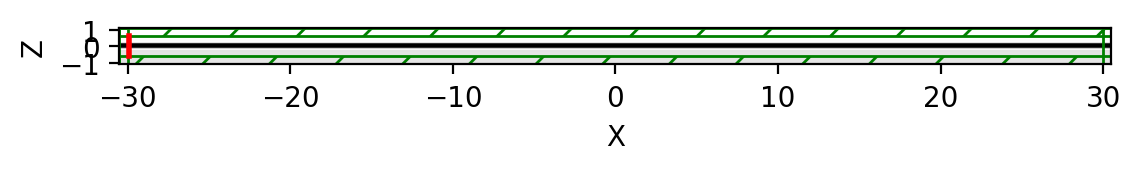

In [115]:
plt.figure(dpi=200)


sim.plot2D(
    output_plane = mp.Volume(
        center = mp.Vector3(y=(gap+waveguide_width)/2),
        size = mp.Vector3(x=Sx,z=Sz)))

plt.show()

<Axes: xlabel='Y', ylabel='Z'>

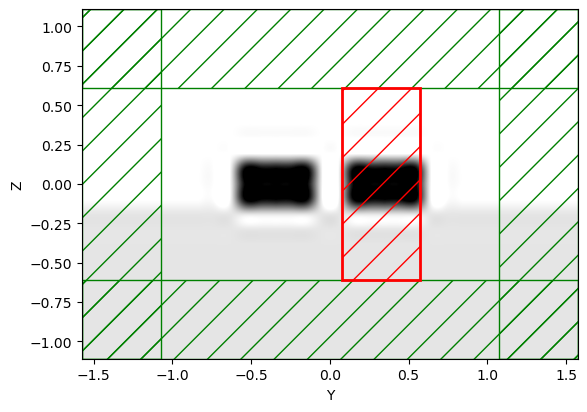

In [116]:
sim.plot2D(
    output_plane = mp.Volume(
        center = mp.Vector3(x=-Sx/2 + pml_size + 0.1),
        size = mp.Vector3(y=Sy, z=Sz)
    ))

In [117]:
sim.run(until=300) # next 300


## Ey for TE polarization

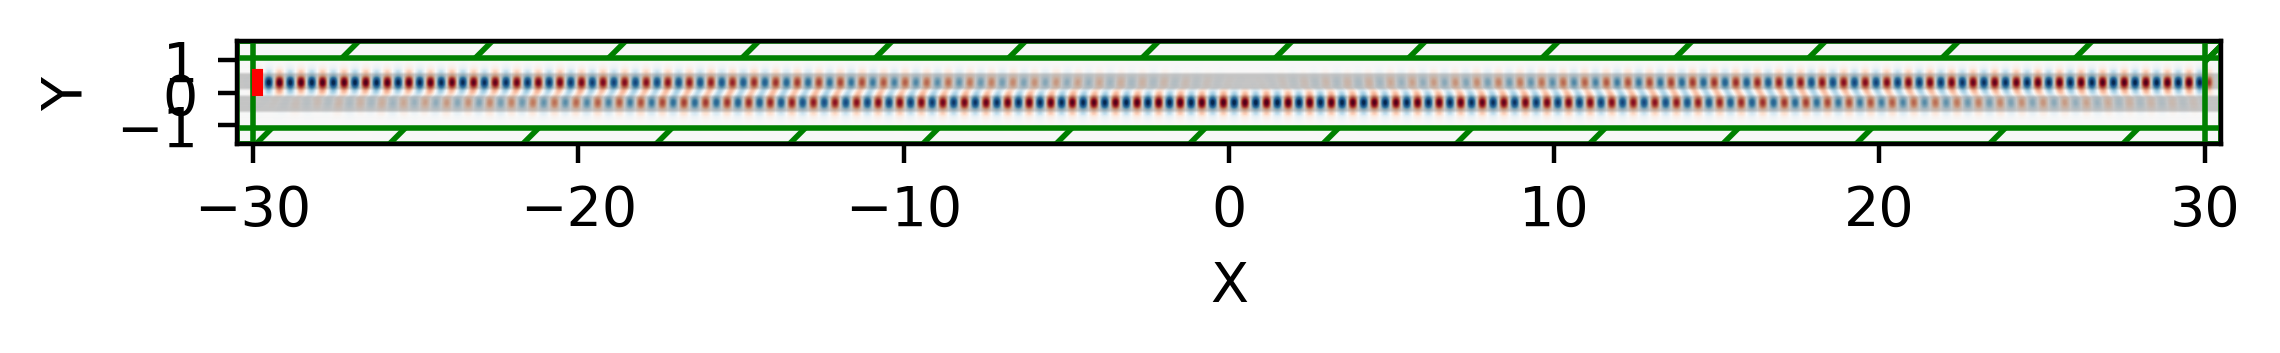

In [118]:
plt.figure(dpi=400)
sim.plot2D(fields= mp.Ey,
    output_plane = mp.Volume(
        center = mp.Vector3(z=0.0),
        size = mp.Vector3(x=Sx,y=Sy, z=0)
    ))
plt.show()

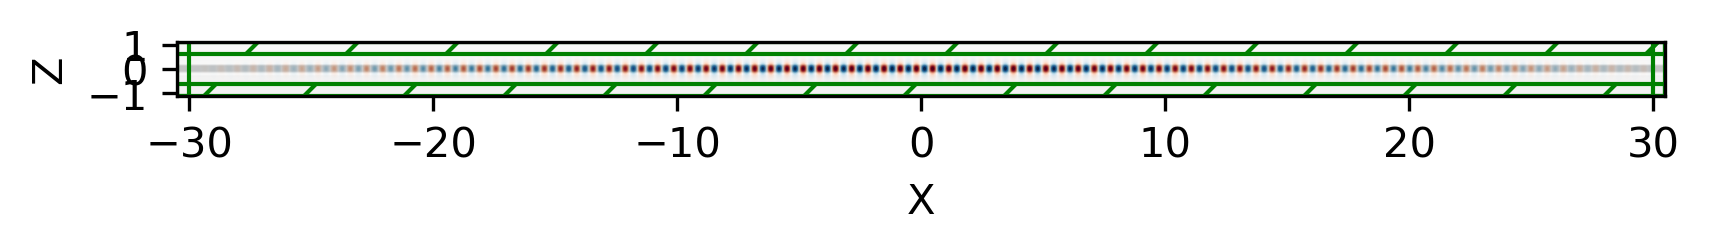

In [119]:
plt.figure(dpi=300)
sim.plot2D(fields= mp.Ey,
    output_plane = mp.Volume(
        center = mp.Vector3(y=-(gap+waveguide_width)/2),
        size = mp.Vector3(x=Sx,z=Sz)))
plt.show()

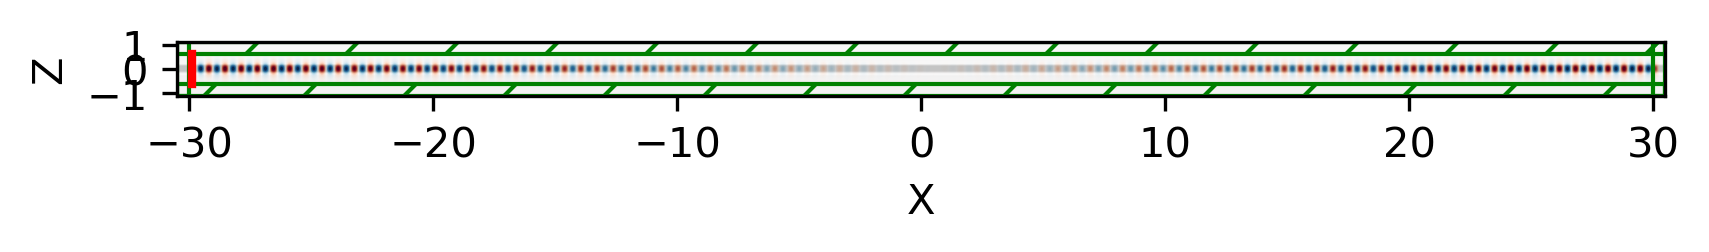

In [120]:
plt.figure(dpi=300)
sim.plot2D(fields= mp.Ey,
    output_plane = mp.Volume(
        center = mp.Vector3(y=(gap+waveguide_width)/2),
        size = mp.Vector3(x=Sx,z=Sz)))
plt.show()

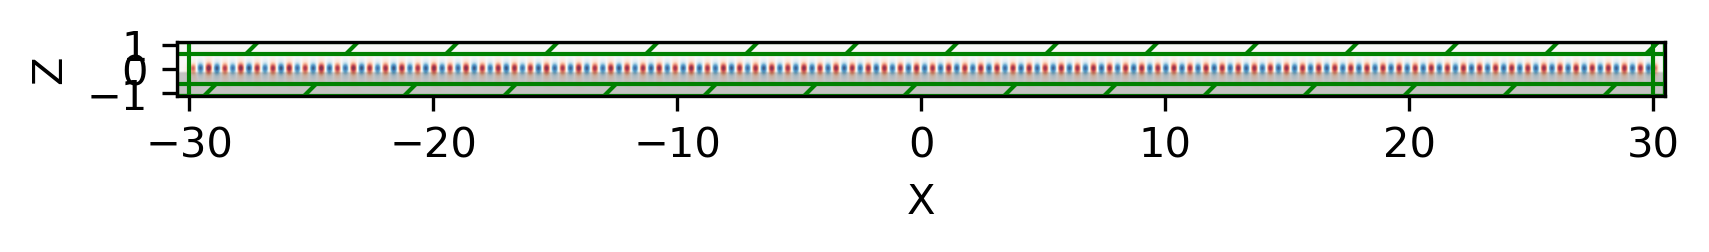

In [121]:
plt.figure(dpi=300)
sim.plot2D(fields= mp.Ey,
    output_plane = mp.Volume(
        center = mp.Vector3(y=0),
        size = mp.Vector3(x=Sx,z=Sz)))
plt.show()

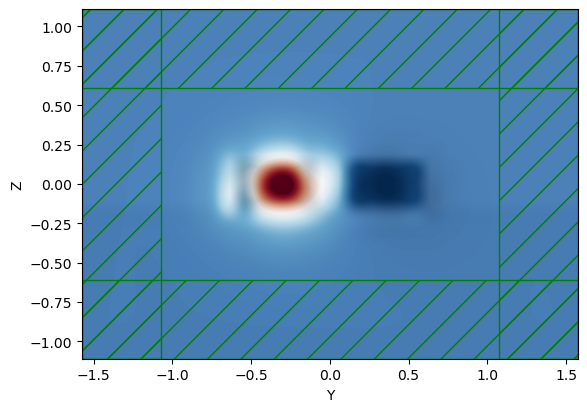

In [122]:
plt.figure(dpi=100)
sim.plot2D(fields= mp.Ey,
    output_plane = mp.Volume(
        center = mp.Vector3(x=4.5), ## if x=0 then its the mid point hence no waveguide
        size = mp.Vector3(y=Sy, z=Sz)
    ))
plt.show()

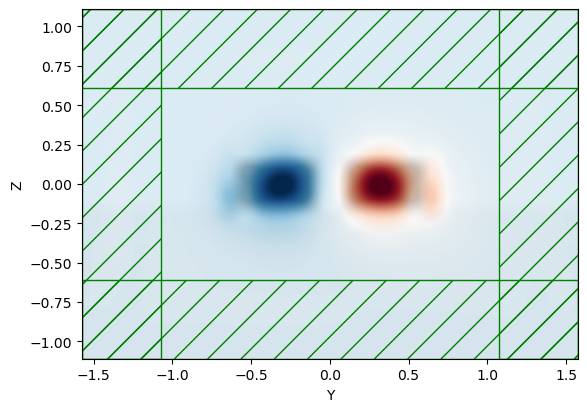

In [124]:
plt.figure(dpi=100)
sim.plot2D(fields= mp.Ey,
    output_plane = mp.Volume(
        center = mp.Vector3(x=-2), ## if x=0 then its the mid point hence no waveguide
        size = mp.Vector3(y=Sy, z=Sz)
    ))
plt.show()

In [ ]:
sim.reset_meep()
f = sim.plot2D(fields= mp.Ez,
    output_plane = mp.Volume(
        center = mp.Vector3(x=0.5), ## if x=0 then its the mid point hence no waveguide
        size = mp.Vector3(y=Sy, z=Sz)
    ))#plt.figure(dpi=100)
Animate = mp.Animate2D(fields=mp.Ez,  realtime=False, normalize=True)
plt.close()

In [ ]:
sim.run(mp.at_every(1, Animate), until=300)
plt.close()

In [ ]:
filename = "straignt_waveguides.mp4"
Animate.to_mp4(10, filename)

In [ ]:
Video(filename)


## Reference images

### gap = 300 nm

xy plane

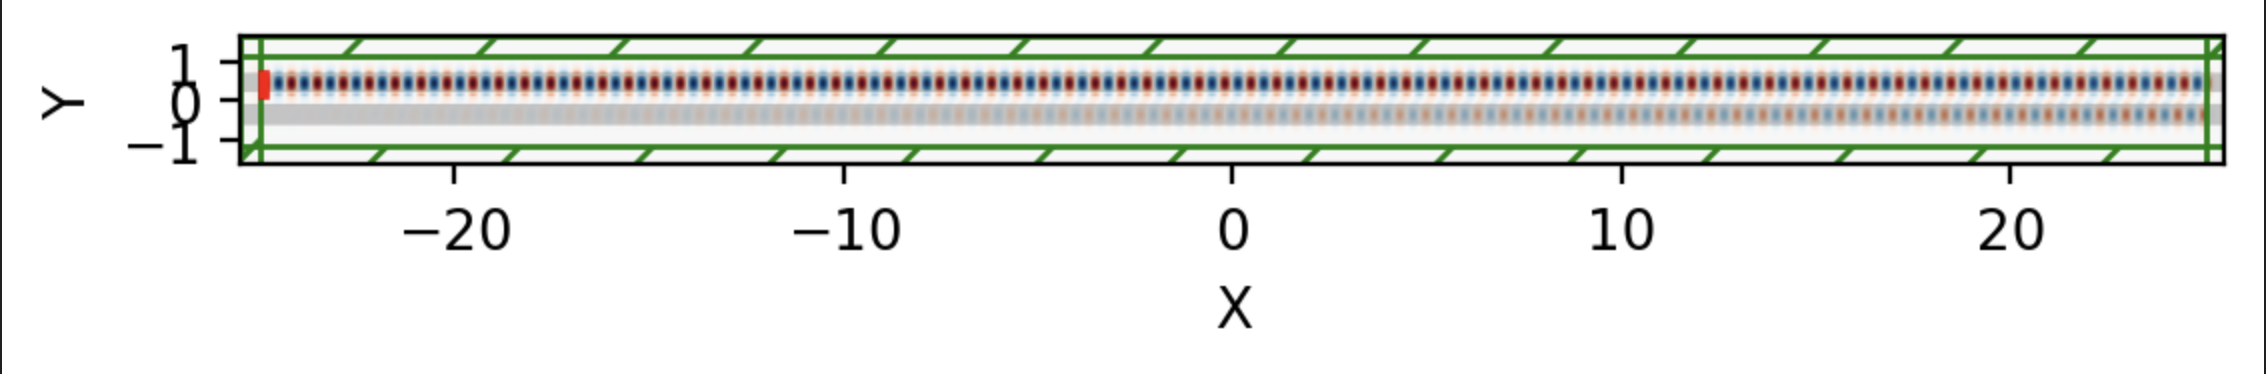

xz plane

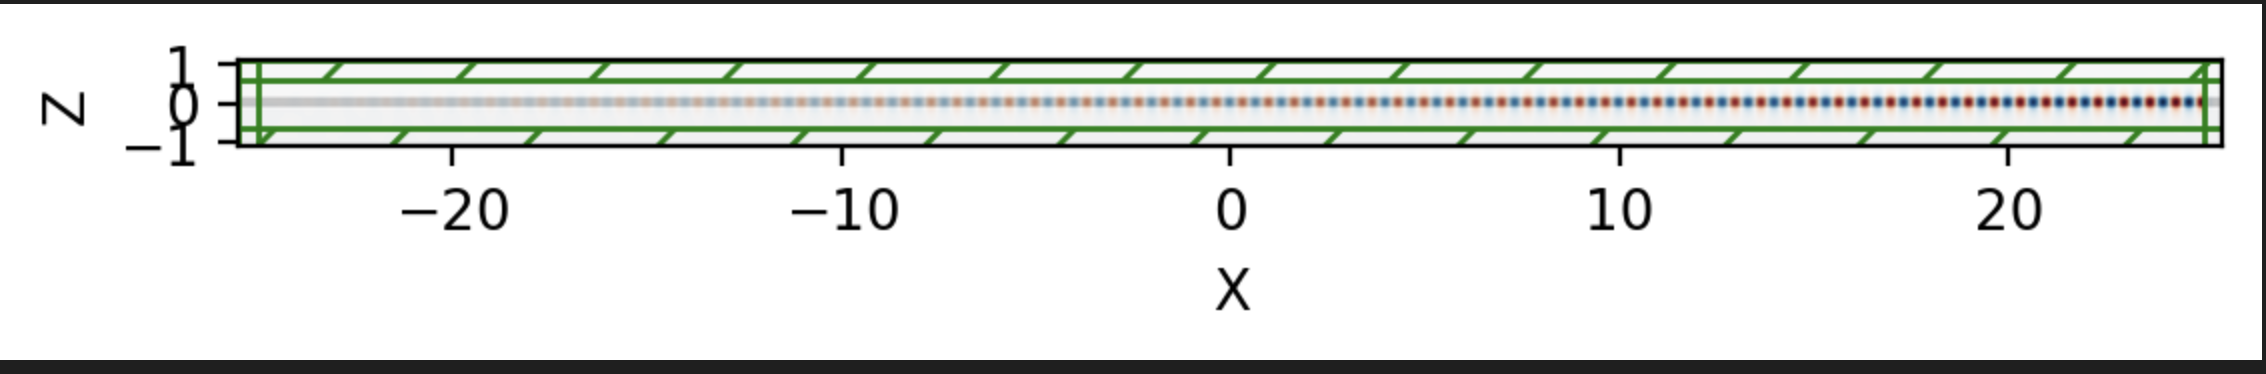